In [1]:
import modules.MainFunctions as MF
import numpy as np
from time import time
import os

file_number=1

%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Description

Toutes les fonctions du module MainFunctions sont commentées, en particulier sont détaillés les inputs et outputs. Les commentaires sont accessibles via la commande *help* :

In [2]:
help(MF)

Help on module modules.MainFunctions in modules:

NAME
    modules.MainFunctions

FUNCTIONS
    compute_RY(M, Lmax, saveRY=True, savePath='data/precomputedRY/', returnRY=False, barycentre=None, verbose=True)
        Compute the RY matrix (Y_m^l(THETA,PHI)) for a matrix of size M*M*M for all l<=Lmax
        
        @param M: size of the matrix, Type int
        @param Lmax: maximum degree, Type int
        @param saveRY: if True save RY in the folder data/precomputedRY/, Type bool
        @param savePath: folder where RY is saved if asked, Type string
        @param returnRY: if True return the matrix RY, Type bool
        @param barycentre: barycentre to translate the matrix RY if needed, Type list(3)
        @param verbose: if True display progress bar, Type bool
        
        @return RY: matrix RY (only if returnRY == True), Type np.array((M**3,(Lmax+1)**2))
    
    construct_harmonic(m, l, N)
        Construct a NxNxN matrix representing the harmonic Y_m^l
        
        @par

On distingue **4 catégories** de fonctions :

- **Les fonctions liées aux harmoniques sphériques :** *legendre, spherical_harmonic, construct_harmonic*

- **Les outils de décomposition et reconstruction :** *decompose, recompose, error, get_object_param*

- **Les outils liés à la matrice RY :** *compute_RY, extract_RY, find_RY*

- **Les fonctions d'affichage :** *show_harmonic, show_reconstructed_border, show_shape*

## Harmoniques sphériques

- La fonction $legendre(m,l,X)$ calcule les valeur du polynôme associé de Legendre $P_m^l$ aux points $X$.


- La fonction $spherical_harmonic(m, l, Theta, Phi)$ calcule les valeurs de l'harmonique sphérique $Y_m^l$ aux points $(Theta,Phi)$.


- La fonction $construct\_harmonic(m,l,N)$ construit l'harmonique $Y_m^l$ sur une matrice de taille $N\times N \times N$.


- La fonction $show\_harmonic(m, l, N)$ affiche l'harmonique sphérique $Y_m^l$ sur une matrice de taille $N\times N \times N$. Plus précisément, elle affiche la valeur absolue de la partie réelle et celle de la partie imaginaire.

**Exemple :**

<IPython.core.display.Javascript object>


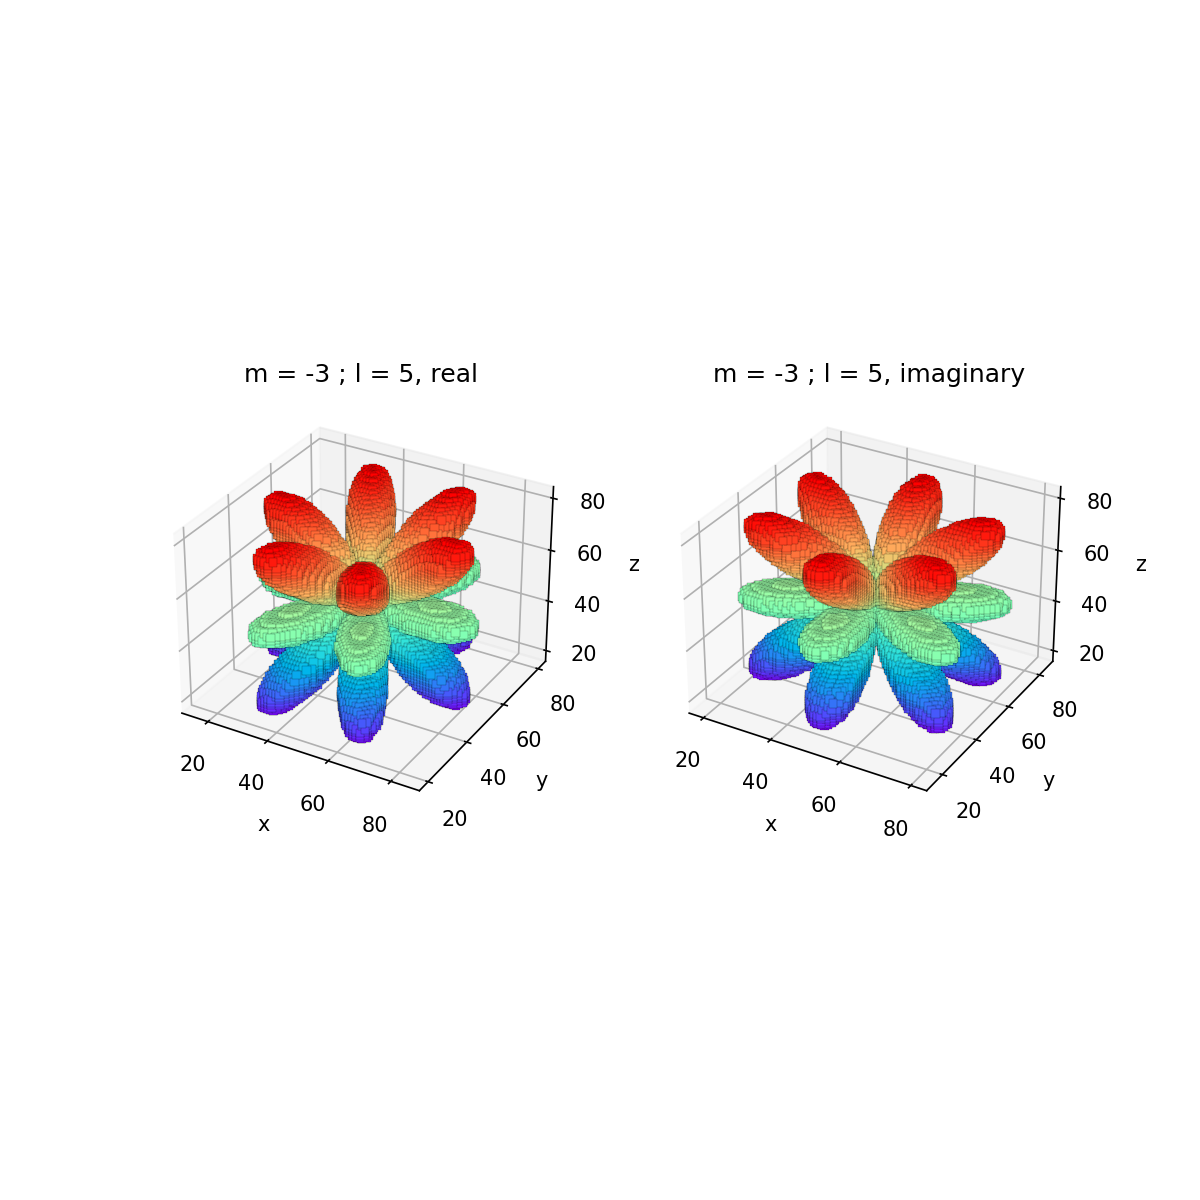

In [3]:
MF.show_harmonic(m=-3, l=5, N=100)

## $RY$ (et $big\_RY$)

- La fonction $compute\_RY(M, Lmax, saveRY, savePath, returnRY, barycentre, verbose)$ calcule la matrice $RY$ (de taille $(M^3,(L_{max}+1)^2)$, avec décalage d'un barycentre ou non) et la renvoie et/ou l'enregistre dans $savePath$.


- La fonction $extract\_RY(big\_RY, N, barycentre)$ extrait d'une grande matrice $big\_RY$ une matrice RY correspondant à un cube de taille $N\times N\times N$ éventuellement décalé d'un barycentre.


- La fonction $find\_RY(N, Lmax, RY\_PATH, verbose)$ cherche si une matrice $big\_RY$ de taille $(M^3,(L_{max}+1)^2)$ avec $M>2N$ est disponible dans $RY\_PATH$, sinon il la calcule et la renvoie.

**Exemple :**

In [4]:
MF.compute_RY(M=100, Lmax=5, saveRY=True, savePath='data/precomputedRY/', returnRY=False, barycentre=None, verbose=True)

Computing RY: 100%|████████████████████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.60it/s]


In [5]:
big_RY = MF.find_RY(N=5, Lmax=8, RY_PATH='data/precomputedRY/',verbose=False) # Don't have Lmax available
big_RY = MF.find_RY(N=7, Lmax=6, RY_PATH='data/precomputedRY/',verbose=False) # Don't have M > 2*N
big_RY = MF.find_RY(N=5, Lmax=6, RY_PATH='data/precomputedRY/') # OK (computed in the previous block)

WARNING in find_RY : no corresponding Lmax in find_RY, computing RY
WARNING in find_RY : N > max(M) in find_R, computing RY
Loading data/precomputedRY/RY_M_10_Lmax_6_.npy


In [6]:
RY = MF.extract_RY(big_RY=big_RY,N=5,barycentre=[-1,1,3])

## Décomposition et reconstruction

- La fonction $decompose(OBJ\_PATH,Lmax,big\_RY,verbose)$ calcule le spectre d'un objet avec en argument optionnel une matrice $big\_RY$ précalculée (qui sera recalculée si les dimensions ne conviennent pas). 
ATTENTION : pour des raisons liées au fait que les points de la frontière sur lesquels est calculée $Y$ sont des demi-entiers, il faut que $big\_RY$ soit au moins 4 fois plus grande que $Y$ (M>4N) pour traiter tous les cas possibles, mais cela implique souvent des matrices beaucoup trop grosses.


- La fonction $recompose(CR\_PATH, N, barycentre, RY, verbose)$ calcule la reconstruction d'un objet à partir de ses paramètres (taille $N$, barycentre) d'un spectre avec en argument optionnel une matrice $RY$ précalculée.


- La fonction $error(shape1, shape2)$ calule l'erreur (en % et selon la norme L1) entre deux formes (volumes pleins).


- La fonction $get\_object\_param(OBJ\_PATH)$ renvoie les paramètres d'un objet : forme originale, taille (de la *bounding box*), barycentre.

**Exemple :**

Les méthodes $decompose(OBJ\_PATH, Lmax)$ et $recompose(CR\_PATH, N)$ permettent respectivement de décomposer une forme (stockée au path $OBJ\_PATH$) sur les $(Lmax+1)^2$ premières harmoniques et de recomposer une forme sur une matrice $N \times N \times N$ en connaissant sont spectre radial (stocké au path $CR\_PATH$). 

Sur le même principe que la fonction $show\_harmonic$, la fonction $show\_reconstructed\_border(CR\_PATH,N,b)$ affiche le résultat de la reconstruction à partir du spectre (qui, s'il est bien calculé, implique que la partie imaginaire est nulle). On utilise la fonction $get\_object\_param(OBJ\_PATH)$ qui renvoie la forme, la taille et le barycentre d'un  objet :

In [7]:
N = 46
Lmax = 9
big_RY = MF.find_RY(N,Lmax,verbose=False)

Loading data/precomputedRY/RY_M_100_Lmax_9_.npy


In [8]:
dir_path = "data/3DSyntheticForm/txt_angular/"
files = os.listdir(dir_path)
path = dir_path+files[0]
form,N,b = MF.get_object_param(path)

t = time()
cr = MF.decompose(OBJ_PATH=path,Lmax=Lmax,verbose=True)
print("Decomposition time : "+str(time()-t)+" s")

t = time()
cr_opti = MF.decompose(OBJ_PATH=path,Lmax=Lmax,big_RY=big_RY,verbose=True)
print("Optimized decomposition time : "+str(time()-t)+" s")

# Pour des décompositions qui se passent mal (et aboutissent à une erreur >> 1), 
# on peut avoir de petites différences dans le spectre
print(np.all(cr==cr_opti))

Decomposition time : 0.49781060218811035 s
Optimized decomposition time : 0.33098769187927246 s
True


In [9]:
pathSpec = "data/Test/test_MF"
np.save(pathSpec,cr)

RY = MF.extract_RY(big_RY,N,b)

In [10]:
t = time()
shape, border_re, border_im = MF.recompose(pathSpec+".npy",N=N,barycentre=b)
print("Reconstruction time : "+str(time()-t)+" s")

t = time()
shape, border_re, border_im = MF.recompose(pathSpec+".npy",N=N,barycentre=b,RY=RY)
print("Optimized reconstruction time : "+str(time()-t)+" s")

Computing RY: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.99it/s]


Reconstruction time : 2.236534357070923 s
Optimized reconstruction time : 0.02599644660949707 s


In [11]:
err = MF.error(shape1=form,shape2=shape)
print("Erreur : "+str(err)+" %")

Erreur : 4.763974930261203 %


## Affichage

- La fonction $show\_harmonic(m, l, N)$ affiche l'harmonique sphérique $Y_m^L$ dans un cube de taille $N\times N\times N$.


- La fonction $show\_reconstructed\_border(border\_re, border\_im)$ trace les frontières réelle et imaginaire (normalement si la décomposition et la reconstruction sont bien réalisées, la partie imaginaire doit être nulle).


- La fonction $show\_shape(PATH, OBJ, reconstruction, N, RY, verbose)$ trace l'object stocké dans $PATH$ si $reconstruction = False$ ou l'object correspondant au spectre stocké dans $PATH$ (ou directement l'objet OBJ) dans un cube de taille $N$ sinon.


**Exemple :**

<IPython.core.display.Javascript object>


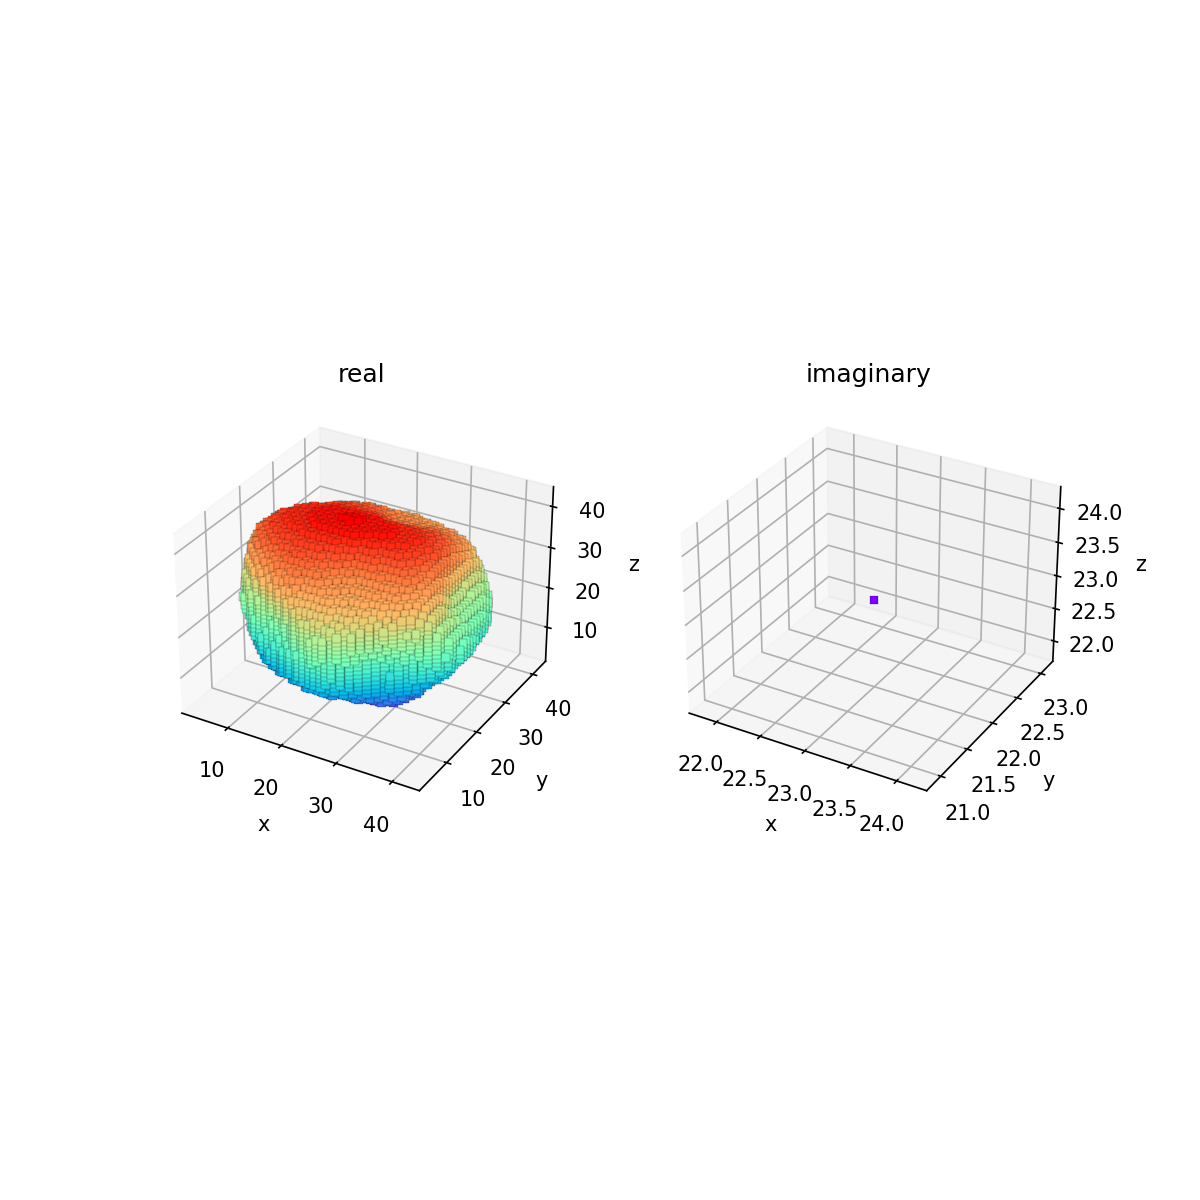

In [12]:
MF.show_reconstructed_border(border_re=border_re,border_im=border_im)

<IPython.core.display.Javascript object>


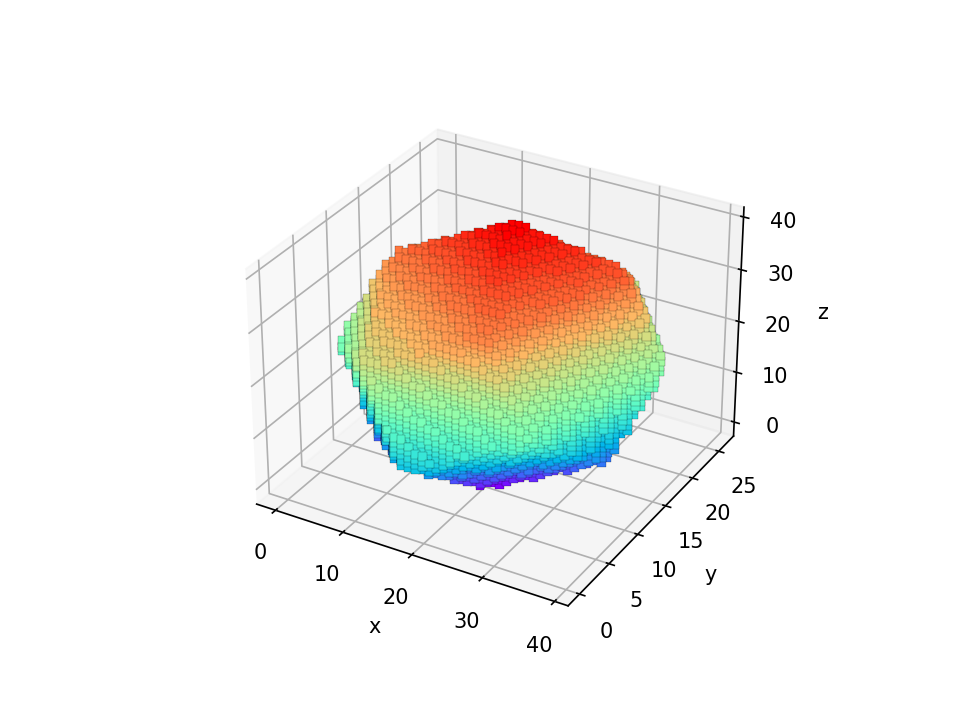

In [13]:
dir_path = "data/3DSyntheticForm/txt_angular/"
files = os.listdir(dir_path)
path = dir_path+files[100]
MF.show_shape(PATH=path)

Computing RY: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.21it/s]


<IPython.core.display.Javascript object>


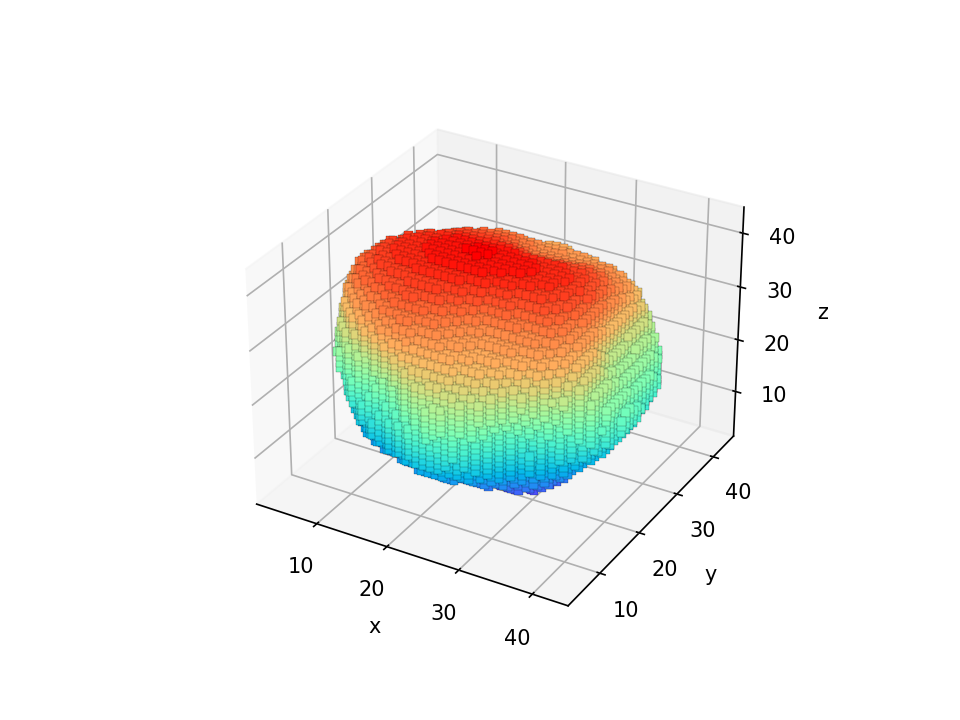

In [14]:
MF.show_shape(PATH=pathSpec+".npy",reconstruction=True,N=46,RY=None,verbose=True)